روی داده های برق داده شده تمام کارهای مورد نیار را انجام داده و در انتها داده با فیچر های زیر را نیز پیش بینی کنید

"CO2Intensity"=491.32, "SystemLoadEA"=4241.05, "Day"=10, "ForecastWindProduction"=54.10, , "SMPEA"=49.56, "ORKTemperature"=9.0, "ORKWindspeed"=14.8, "ActualWindProduction"=54.0, "Month"=12, "SystemLoadEP2"=4426.84]

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
df=pd.read_csv('electricity.csv', index_col=0, parse_dates=True, na_values=['?'])

In [8]:
df.head()

,Holiday,HolidayFlag,DayOfWeek,WeekOfYear,Day,Month,Year,PeriodOfDay,ForecastWindProduction,SystemLoadEA,SMPEA,ORKTemperature,ORKWindspeed,CO2Intensity,ActualWindProduction,SystemLoadEP2,SMPEP2
DateTime,,,,,,,,,,,,,,,,,
2011-01-11 00:00:00,None,0,1,44,1,11,2011,0,315.31,3388.77,49.26,6.0,9.3,600.71,356.0,3159.60,54.32
2011-01-11 00:30:00,None,0,1,44,1,11,2011,1,321.80,3196.66,49.26,6.0,11.1,605.42,317.0,2973.01,54.23
2011-01-11 01:00:00,None,0,1,44,1,11,2011,2,328.57,3060.71,49.10,5.0,11.1,589.97,311.0,2834.00,54.23
2011-01-11 01:30:00,None,0,1,44,1,11,2011,3,335.60,2945.56,48.04,6.0,9.3,585.94,313.0,2725.99,53.47
2011-01-11 02:00:00,None,0,1,44,1,11,2011,4,342.90,2849.34,33.75,6.0,11.1,571.52,346.0,2655.64,39.87


In [9]:
a = df.resample('30min')

In [10]:
dfs = a.asfreq()

In [11]:
len(df), len(dfs)

(38014, 52128)

In [12]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 52128 entries, 2011-01-11 00:00:00 to 2013-12-31 23:30:00
Freq: 30T
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Holiday                 38014 non-null  object 
 1   HolidayFlag             38014 non-null  float64
 2   DayOfWeek               38014 non-null  float64
 3   WeekOfYear              38014 non-null  float64
 4   Day                     38014 non-null  float64
 5   Month                   38014 non-null  float64
 6   Year                    38014 non-null  float64
 7   PeriodOfDay             38014 non-null  float64
 8   ForecastWindProduction  38009 non-null  float64
 9   SystemLoadEA            38012 non-null  float64
 10  SMPEA                   38012 non-null  float64
 11  ORKTemperature          37719 non-null  float64
 12  ORKWindspeed            37715 non-null  float64
 13  CO2Intensity            38007 non-null  float6

In [13]:
dfs.dropna(inplace=True)

In [14]:
dfs=dfs.drop(columns=['Holiday'], axis=1)

In [15]:
dY = dfs.iloc[:, -1]
dX = dfs.iloc[:,:-1]

In [16]:
last_train_index = int(len(dY) * 0.75)

In [17]:
Y_train = dY.iloc[:last_train_index]
Y_test = dY.iloc[last_train_index:]

In [18]:
X_train = dX.iloc[:last_train_index]
X_test = dX.iloc[last_train_index:]

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

In [20]:
lr = LinearRegression().fit(X_train, Y_train)

In [21]:
lr_p = lr.predict(X_test)

In [22]:
errors = pd.DataFrame(columns=['MAPE', 'RMSE'])
def err(name, y_pred):
    mape = mean_absolute_percentage_error(y_true=Y_test, y_pred=y_pred)
    rmse = mean_squared_error(y_true=Y_test, y_pred=y_pred, squared=False)
    errors.loc[name, :] = [mape, rmse]

In [23]:
err('LR', lr_p)
errors

,MAPE,RMSE
LR,0.332021,26.239779


In [24]:
results = pd.DataFrame({'True Values':Y_test})
results

,True Values
DateTime,
2013-06-17 16:00:00,77.30
2013-06-17 16:30:00,77.60
2013-06-17 17:00:00,77.60
2013-06-17 17:30:00,77.60
2013-06-17 18:00:00,77.58
...,...
2013-12-31 21:30:00,42.45
2013-12-31 22:00:00,33.83
2013-12-31 22:30:00,31.75


In [25]:
results['LR'] = lr_p
results

,True Values,LR
DateTime,,
2013-06-17 16:00:00,77.30,83.172629
2013-06-17 16:30:00,77.60,87.110730
2013-06-17 17:00:00,77.60,86.339029
2013-06-17 17:30:00,77.60,86.349037
2013-06-17 18:00:00,77.58,84.414081
...,...,...
2013-12-31 21:30:00,42.45,58.107605
2013-12-31 22:00:00,33.83,55.234255
2013-12-31 22:30:00,31.75,50.682390


<AxesSubplot: xlabel='DateTime'>

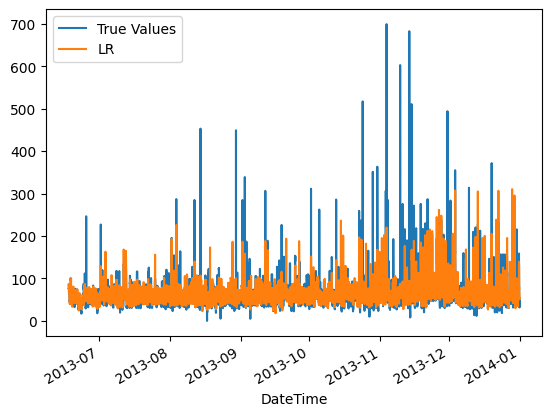

In [26]:
results.plot()


In [27]:
cnt = dY.iloc[:]
lag_y = pd.DataFrame({'y0':cnt})
for i in range(1,51):
    lag_y[f'y-{i}'] = cnt.shift(i)
lag_y

,y0,y-1,y-2,y-3,y-4,y-5,y-6,y-7,y-8,y-9,...,y-41,y-42,y-43,y-44,y-45,y-46,y-47,y-48,y-49,y-50
DateTime,,,,,,,,,,,,,,,,,,,,,
2011-01-11 00:00:00,54.32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-11 00:30:00,54.23,54.32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-11 01:00:00,54.23,54.23,54.32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-11 01:30:00,53.47,54.23,54.23,54.32,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-11 02:00:00,39.87,53.47,54.23,54.23,54.32,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-12-31 21:30:00,42.45,50.60,59.48,62.05,62.05,66.12,105.02,132.50,158.85,134.93,...,42.62,42.62,42.62,59.01,42.62,45.86,64.61,64.61,70.81,65.18
2013-12-31 22:00:00,33.83,42.45,50.60,59.48,62.05,62.05,66.12,105.02,132.50,158.85,...,42.62,42.62,42.62,42.62,59.01,42.62,45.86,64.61,64.61,70.81
2013-12-31 22:30:00,31.75,33.83,42.45,50.60,59.48,62.05,62.05,66.12,105.02,132.50,...,42.62,42.62,42.62,42.62,42.62,59.01,42.62,45.86,64.61,64.61


In [28]:
l_train = lag_y.iloc[:last_train_index, 1:]
ly_train = lag_y.iloc[:last_train_index, 0]
l_train.dropna(inplace=True)
ly_train = ly_train.loc[l_train.index]
l_test = lag_y.iloc[last_train_index:, 1:]
ly_test = lag_y.iloc[last_train_index:, 0]

In [29]:
lagmodel = LinearRegression().fit(l_train, ly_train)

In [30]:
y_p_lag = lagmodel.predict(l_test)

In [31]:
results['50halfTime_lag'] = y_p_lag

In [32]:
err('50halfTime_lag', y_p_lag)
errors

,MAPE,RMSE
LR,0.332021,26.239779
50halfTime_lag,0.279124,23.595438


<AxesSubplot: xlabel='DateTime'>

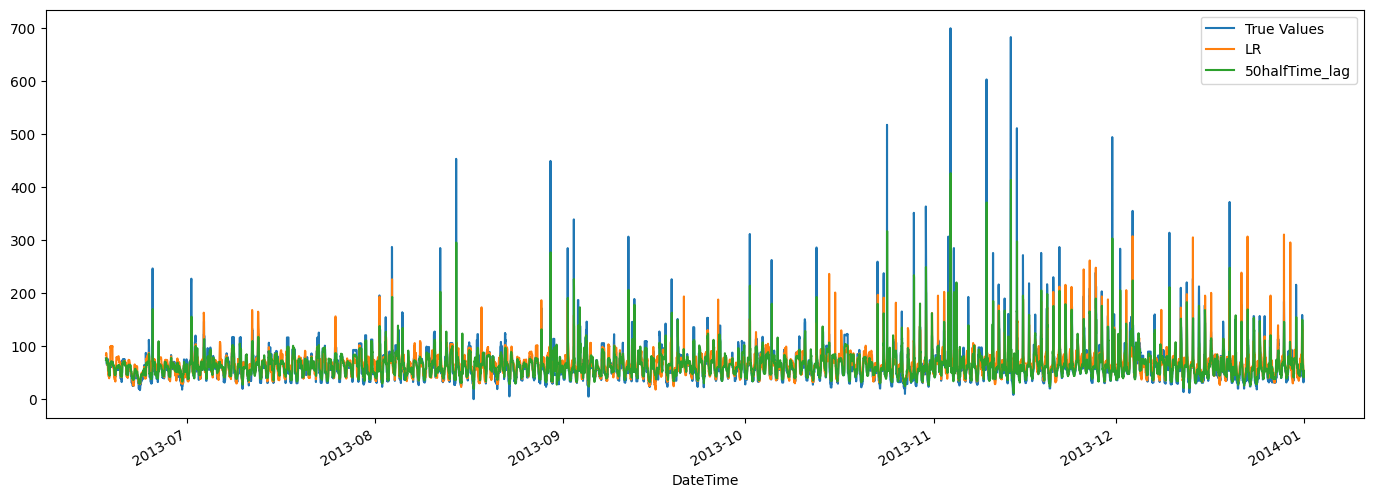

In [33]:
results.plot(figsize=(17,6))


In [34]:
xlag_train = pd.concat([X_train.loc[l_train.index], l_train], axis=1)
xlag_test = pd.concat([X_test.loc[l_test.index], l_test], axis=1)

In [35]:
lagmodel2 = LinearRegression().fit(xlag_train, ly_train)

In [36]:
y_p_lag2 = lagmodel2.predict(xlag_test)

In [37]:
results['50halfTime_lag_with_x'] = y_p_lag2

In [38]:
err('50halfTime_lag_with_x', y_p_lag2)
errors

,MAPE,RMSE
LR,0.332021,26.239779
50halfTime_lag,0.279124,23.595438
50halfTime_lag_with_x,0.248393,22.591608


<AxesSubplot: xlabel='DateTime'>

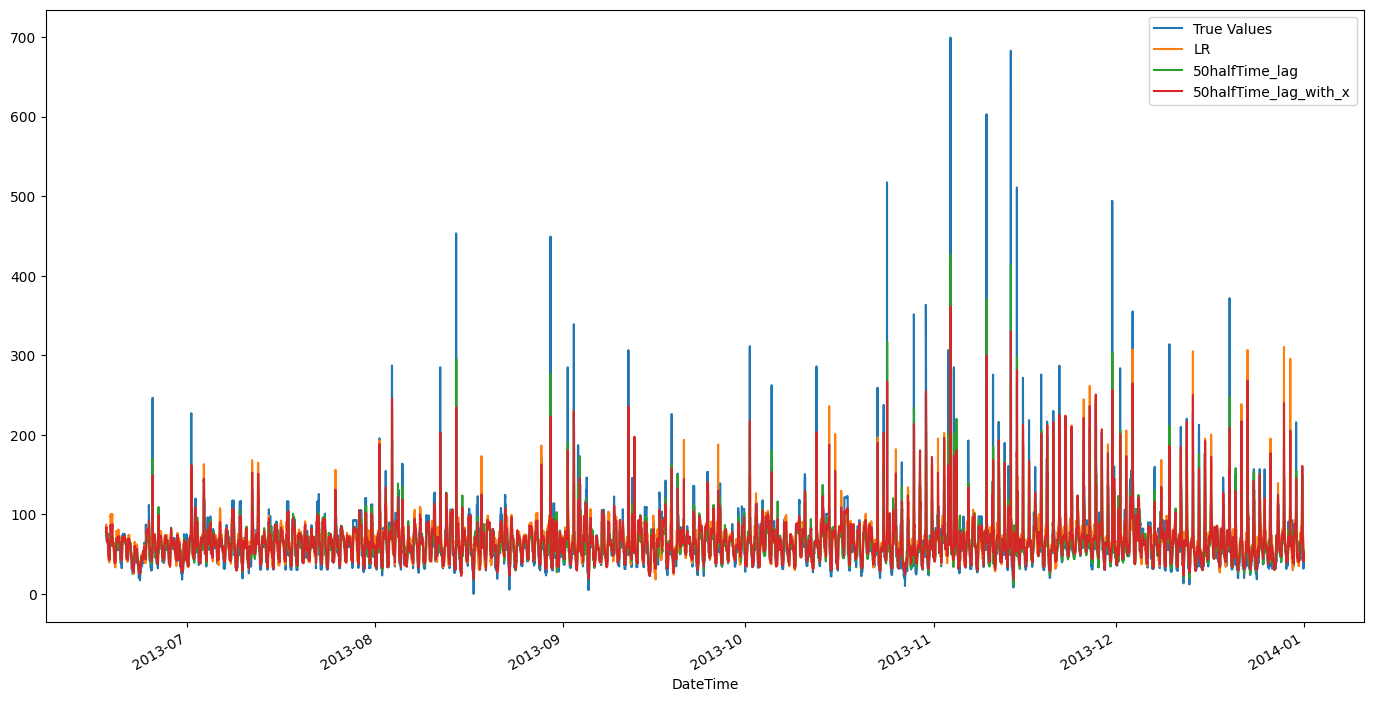

In [39]:
results.plot(figsize=(17,9))


به صورت واترمارک کنید و خروجی را ذخیره کنید logo.pngروی عکس یکی از دوستان یا خانواده

In [40]:
import cv2 as cv
logo = cv.imread("Logo.png")
img = cv.imread("father.jpg")

In [41]:
# calculating dimensions
# height and width of the logo
h_logo, w_logo, _ = logo.shape
  
# height and width of the image
h_img, w_img, _ = img.shape

In [42]:
# calculating coordinates of center
# calculating center, where we are going 
# to place our watermark
center_y = int(h_img/2)
center_x = int(w_img/2)
  
# calculating from top, bottom, right and left
top_y = center_y - int(h_logo/2)
bottom_y = top_y + h_logo
left_x = center_x - int(w_logo/2)
right_x = left_x + w_logo

In [43]:
# adding watermark to the image
destination = img[top_y:bottom_y, left_x:right_x]
result = cv.addWeighted(destination,1, logo, 0.5, 0)

In [44]:
# displaying and saving image
img[top_y:bottom_y, left_x:right_x] = result
cv.imwrite("watermarked.jpg", img)

True